In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import os

pd.set_option('display.max_columns', None)

In [7]:
path = '/home/r3406/SharedFiles/Data/PublicData/KNHANES'

In [8]:
nutri_frontmask = [
    'L', 'LS', 'LK', 'LF',
    'DA', 'DQ',
    'Y',
    'N', 'NF',
]

In [9]:
basic_feats = [ 
    'age', 'sex',
]

nutri_useable_feats = [
    'n_wat_c',
    'nf_carot',
    'n_fm_wt',
    'nf_va',
    'nf_k',
    'n_kindg1',
    'n_kindg2',
    'nf_retin',
    'nf_na',
    'nf_phos',
    'nf_ca',
    'nf_intk',
    'nf_cho',
    'nf_en',
    'nf_water',
    'nf_fe',
    'nf_prot',
    'nf_fat',
    'nf_b1',
    'n_diet',
    'nf_vitc',
    'n_meal',
    'n_meal_t',
    'n_fcode',
    'n_mtype',
    'n_meal_p',
    'n_dcode',
    'nf_niac',
    'nf_b2',
    'n_dname',
    'n_ap',
    'n_fname',
    'n_day',
    'n_dusual',
    'n_cd_vol',
    'n_diet_why',
    'n_fname3',
    'n_fcode3',
    'nf_intk3',
    'n_td_vol',
    'n_fname2',
    'n_fcode2',
]

health_status_feats = [
    'DC1_dg',
    'DC11_dg',
    'DC12_dg',
    'DC2_dg',
    'DC3_dg',
    'DC4_dg',
    'DC5_dg',
    'DC6_dg',
    'DC7_dg',
    'DE1_dg',
    'DF2_dg',
    'DF2_dg',
    'DI1_dg',
    'DI3_dg',
    'DI4_dg',
    'DI5_dg',
    'DI6_dg',
    'DJ2_dg',
    'DJ4_dg',
    'DM1_dg',
    'DM2_dg',
    'DM3_dg',
    'DN1_dg',
    'DK4_dg',
]

white_list_prefix = [
    'D', 'H', 
]


In [10]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [11]:
def get_desired_features(df, basic_mask, front_mask):
    df.columns = df.columns.str.lower()
    col_mask = []
    for col in df.columns:
        front = col.split('_')[0]
        if front in [s.lower() for s in front_mask]:
            col_mask.append(col)
    if not col_mask:
        return None
    col_mask += [s.lower() for s in basic_mask]
    print(col_mask) # tst
    return df[col_mask]

In [12]:
# start_year, end_year = 5, 18 # 2005 to 2018 inclusive
# min_age, max_age = 20, 70 # inclusive

# df1_ls = []
# for file in os.listdir(path):
#     f = os.path.join(path, file)
#     # print(f)
#     year = file.split('_')[0][2:]
#     if year.isnumeric():
#         year = int(year)
#         # print(year)
#         # filter out year by filename before reading
#         if os.path.isfile(f) and (
#                 year >= start_year and year <= end_year):
#             print(file + '\n')
#             df = pd.read_sas(f)

#             # get desired features filtered
#             #df = get_desired_features(df, knhanes_basic_mask, knhanes_nutri_frontmask)
#             if df is None:
#                 continue

#             # get age filtered df, all cols already LOWERCASED
#             df = df.loc[(df['age']>= min_age) & (df['age'] <= max_age)]

#             # other minor formatting
#             df.year = df.year.astype(int)
#             df.age = df.age.astype(int)
#             df.sex = df.sex.astype(int)
#             # append
#             df1_ls.append(df)

            

# len(df1_ls)

In [15]:
# df1 = pd.concat(df1_ls)
# df1.columns

In [17]:
# # save
# df1.to_pickle('knhanes_05_18_nutri_feats_all.pkl')

In [18]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [19]:
# # if starting from saved pkl
df1 = pd.read_pickle('knhanes_05_18_nutri_feats_all.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'knhanes_05_18_nutri_feats_all.pkl'

In [ ]:
break

In [ ]:
# get nan counts for each year, and total nan_rate for each feat

dfExistYears = df1.groupby('year').any().astype(int).T
dfExistYears.index.names = ['features']
dfExistYears.drop(['age', 'sex'], inplace=True)
dfExistYears.insert(0, 'nan_count', df1.isnull().sum())
dfExistYears.insert(0, 'nan_rate', (dfExistYears['nan_count'] / df1.shape[0]).round(decimals=2) )
dfExistYears.sort_values('nan_rate', inplace=True)
print(dfExistYears.shape)
dfExistYears.head()

(273, 15)


year,nan_rate,nan_count,2005,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
features,,,,,,,,,,,,,,,
n_wat_c,0.02,93097,1,1,1,1,1,1,1,1,1,1,1,1,1
nf_carot,0.02,99825,1,1,1,1,1,1,1,1,1,1,1,1,1
n_fm_wt,0.02,99825,1,1,1,1,1,1,1,1,1,1,1,1,1
nf_va,0.02,99825,1,1,1,1,1,1,1,1,1,1,1,1,1
nf_k,0.02,99825,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
## save
dfExistYears.to_pickle('knhanes_05_18_nutri_feats_nans.pkl')
dfExistYears.to_csv('knhanes_05_18_nutri_feats_nans.csv')

In [ ]:
# # if starting from saved pkl
dfExistYears = pd.read_pickle('knhanes_05_18_nutri_feats_nans.pkl')

<AxesSubplot:title={'center':'Distribution of nan_rate'}, ylabel='Frequency'>

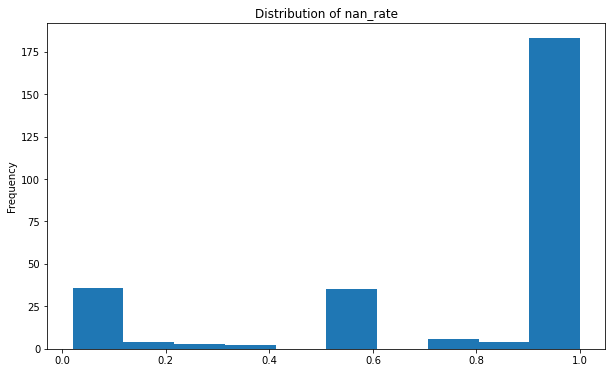

In [ ]:
dfExistYears.nan_rate.plot(kind='hist', figsize=(10,6), title='Distribution of nan_rate')

In [ ]:
# remove all nan_rate == 1.0 rows
dfExistYears = dfExistYears.loc[dfExistYears.nan_rate < 1.0]
dfExistYears.shape

(151, 15)

<AxesSubplot:title={'center':'Distribution of nan_rate sub 1.0'}, ylabel='Frequency'>

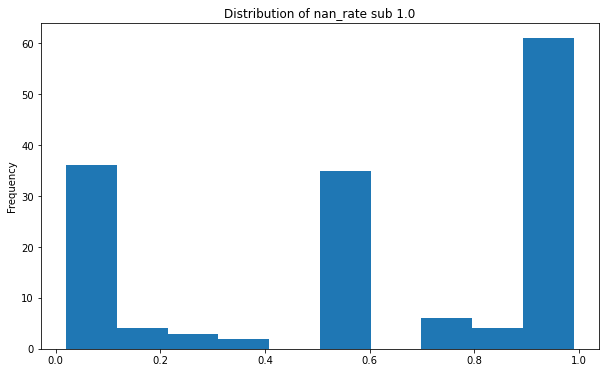

In [ ]:
dfExistYears.nan_rate.plot(kind='hist', figsize=(10,6), title='Distribution of nan_rate sub 1.0')

<AxesSubplot:title={'center':'Distribution of nan_rate sub 0.9'}, ylabel='Frequency'>

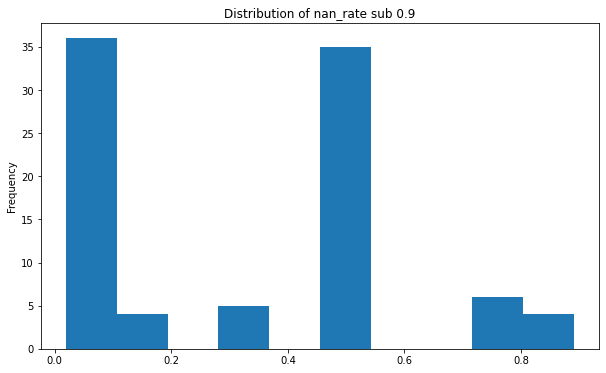

In [ ]:
dfExistYears.loc[dfExistYears.nan_rate < 0.9].nan_rate.plot(kind='hist', figsize=(10,6), title='Distribution of nan_rate sub 0.9')

In [ ]:
# with all 1.0 nan_rate rows already deleted, determine how much is reduced by subsequent thresholding 
for th in np.arange(1.0, 0.0, -0.1):
    th = round(th, 2) # avoid floating point rounding error
    th_num_rows = dfExistYears.loc[dfExistYears.nan_rate < th].shape[0]
    print('Num rows with nan_rate under {} is: {}, a reduction of {}%.'.format(th, th_num_rows, round((dfExistYears.shape[0]-th_num_rows)/dfExistYears.shape[0]*100)))

Num rows with nan_rate under 1.0 is: 151, a reduction of 0%.
Num rows with nan_rate under 0.9 is: 90, a reduction of 40%.
Num rows with nan_rate under 0.8 is: 86, a reduction of 43%.
Num rows with nan_rate under 0.7 is: 80, a reduction of 47%.
Num rows with nan_rate under 0.6 is: 80, a reduction of 47%.
Num rows with nan_rate under 0.5 is: 45, a reduction of 70%.
Num rows with nan_rate under 0.4 is: 45, a reduction of 70%.
Num rows with nan_rate under 0.3 is: 42, a reduction of 72%.
Num rows with nan_rate under 0.2 is: 40, a reduction of 74%.
Num rows with nan_rate under 0.1 is: 35, a reduction of 77%.


In [ ]:
nutriFeats_NRlt30 = dfExistYears.loc[dfExistYears.nan_rate < 0.3].index
print('len:', len(nutriFeats_NRlt30))
print(nutriFeats_NRlt30)

len: 42
Index(['n_wat_c', 'nf_carot', 'n_fm_wt', 'nf_va', 'nf_k', 'n_kindg1',
       'n_kindg2', 'nf_retin', 'nf_na', 'nf_phos', 'nf_ca', 'nf_intk',
       'nf_cho', 'nf_en', 'nf_water', 'nf_fe', 'nf_prot', 'nf_fat', 'nf_b1',
       'n_diet', 'nf_vitc', 'n_meal', 'n_meal_t', 'n_fcode', 'n_mtype',
       'n_meal_p', 'n_dcode', 'nf_niac', 'nf_b2', 'n_dname', 'n_ap', 'n_fname',
       'n_day', 'n_dusual', 'n_cd_vol', 'n_diet_why', 'n_fname3', 'n_fcode3',
       'nf_intk3', 'n_td_vol', 'n_fname2', 'n_fcode2'],
      dtype='object', name='features')


In [ ]:
df_NutriFeats_NRlt30 = df1[nutriFeats_NRlt30]
df_NutriFeats_NRlt30.head()

,n_wat_c,nf_carot,n_fm_wt,nf_va,nf_k,n_kindg1,n_kindg2,nf_retin,nf_na,nf_phos,nf_ca,nf_intk,nf_cho,nf_en,nf_water,nf_fe,nf_prot,nf_fat,nf_b1,n_diet,nf_vitc,n_meal,n_meal_t,n_fcode,n_mtype,n_meal_p,n_dcode,nf_niac,nf_b2,n_dname,n_ap,n_fname,n_day,n_dusual,n_cd_vol,n_diet_why,n_fname3,n_fcode3,nf_intk3,n_td_vol,n_fname2,n_fcode2
0,4.0,0.000,57.0,0.000000,10.054867,b'01',b'01',0.0,68.837168,20.496460,1.546903,38.672566,20.303097,92.427434,16.203805,0.193363,1.585575,0.309381,0.007735,2.0,0.000,2.0,b'1310',b'01211',1.0,6.0,b'10317',0.696106,0.003867,b'\xb6\xb1\xb6\xf3\xb8\xe9',1.0,"b'\xbd\xd2,\xbd\xd2\xb0\xa1\xb0\xf8\xbd\xc4\xc...",b'\xb1\xdd',b'2',1356.0,8.0,b'\xb6\xb1',b'01211',38.672566,920.0,b'\xb0\xa1\xb7\xa1\xb6\xb1/\xb9\xe9\xbc\xb3\xb...,b'01211'
1,4.0,0.000,120.0,39.893805,240.176991,b'01',b'01',0.0,1613.663717,83.044248,29.309735,81.415929,49.419469,348.460177,5.617699,0.325664,7.001770,12.130973,0.504779,2.0,0.000,2.0,b'1310',b'20036',1.0,6.0,b'10317',0.814159,0.350088,b'\xb6\xb1\xb6\xf3\xb8\xe9',1.0,"b'\xb6\xf3\xb8\xe9,\xb3\xca\xb1\xb8\xb8\xae \x...",b'\xb1\xdd',b'2',1356.0,8.0,b'\xb6\xf3\xb8\xe9',b'01031',82.568878,920.0,b'\xb6\xf3\xb8\xe9',b'01031'
2,4.0,104.400,36.0,17.280000,108.000000,b'06',b'06',0.0,412.560000,20.880000,16.920000,36.000000,1.404000,6.480000,32.688000,0.288000,0.720000,0.180000,0.021600,2.0,5.040,2.0,b'1310',b'06063',1.0,6.0,b'51513',0.288000,0.021600,b'\xb9\xe8\xc3\xdf\xb1\xe8\xc4\xa1',1.0,"b'\xb1\xe8\xc4\xa1,\xb9\xe8\xc3\xdf\xb1\xe8\xc...",b'\xb1\xdd',b'2',50.0,8.0,"b'\xb1\xe8\xc4\xa1,\xb9\xe8\xc3\xdf\xb1\xe8\xc...",b'06063',36.000000,50.0,"b'\xb1\xe8\xc4\xa1,\xb9\xe8\xc3\xdf\xb1\xe8\xc...",b'06063'
3,4.0,183.483,8.7,30.624000,29.232000,b'06',b'06',0.0,76.212000,4.785000,6.090000,8.700000,1.026600,4.524000,7.020900,0.078300,0.295800,0.069600,0.012180,2.0,1.653,2.0,b'1310',b'06070',1.0,6.0,b'51528',0.078300,0.012180,b'\xc6\xc4\xb1\xe8\xc4\xa1',1.0,"b'\xb1\xe8\xc4\xa1,\xc6\xc4\xb1\xe8\xc4\xa1'",b'\xb1\xdd',b'2',15.0,8.0,"b'\xb1\xe8\xc4\xa1,\xc6\xc4\xb1\xe8\xc4\xa1'",b'06070',8.700000,15.0,"b'\xb1\xe8\xc4\xa1,\xc6\xc4\xb1\xe8\xc4\xa1'",b'06070'
4,4.0,8.362,3.7,1.406000,14.800000,b'06',b'06',0.0,22.052000,1.480000,1.369000,3.700000,0.273800,1.221000,3.270800,0.014800,0.059200,0.011100,0.005180,2.0,0.703,3.0,b'1820',b'06059',3.0,6.0,b'51505',0.018500,0.001850,b'\xb1\xef\xb5\xce\xb1\xe2',1.0,"b'\xb1\xe8\xc4\xa1,\xb1\xef\xb5\xce\xb1\xe2'",b'\xb1\xdd',b'2',5.0,8.0,"b'\xb1\xe8\xc4\xa1,\xb1\xef\xb5\xce\xb1\xe2'",b'06059',3.700000,5.0,"b'\xb1\xe8\xc4\xa1,\xb1\xef\xb5\xce\xb1\xe2'",b'06059'


In [ ]:
df_NutriFeats_NRlt30['n_kindg1'] = df_NutriFeats_NRlt30['n_kindg1'].str[1:].astype(float)
df_NutriFeats_NRlt30['n_kindg2'] = df_NutriFeats_NRlt30['n_kindg2'].str[1:].astype(float)
df_NutriFeats_NRlt30['n_meal_t'] = df_NutriFeats_NRlt30['n_meal_t'].str[1:].astype(float)
df_NutriFeats_NRlt30['n_fcode'] = df_NutriFeats_NRlt30['n_fcode'].str[1:].astype(float)
df_NutriFeats_NRlt30['n_dcode'] = df_NutriFeats_NRlt30['n_dcode'].str[1:].astype(float)
# 'n_kindg1', 'n_kindg2', 'n_meal_t', 'n_fcode', 'n_dcode', 'n_dusual', 'n_fcode3', 'n_fcode2'
#
# 'n_dname', 'n_fname', 'n_fname3', 'n_fname2'
df_NutriFeats_NRlt30.head()

/tmp/ipykernel_594997/2364052523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NutriFeats_NRlt30['n_kindg1'] = df_NutriFeats_NRlt30['n_kindg1'].str[1:].astype(float)
/tmp/ipykernel_594997/2364052523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NutriFeats_NRlt30['n_kindg2'] = df_NutriFeats_NRlt30['n_kindg2'].str[1:].astype(float)


,n_wat_c,nf_carot,n_fm_wt,nf_va,nf_k,n_kindg1,n_kindg2,nf_retin,nf_na,nf_phos,nf_ca,nf_intk,nf_cho,nf_en,nf_water,nf_fe,nf_prot,nf_fat,nf_b1,n_diet,nf_vitc,n_meal,n_meal_t,n_fcode,n_mtype,n_meal_p,n_dcode,nf_niac,nf_b2,n_dname,n_ap,n_fname,n_day,n_dusual,n_cd_vol,n_diet_why,n_fname3,n_fcode3,nf_intk3,n_td_vol,n_fname2,n_fcode2
0,4.0,0.000,57.0,0.000000,10.054867,1.0,1.0,0.0,68.837168,20.496460,1.546903,38.672566,20.303097,92.427434,16.203805,0.193363,1.585575,0.309381,0.007735,2.0,0.000,2.0,b'1310',b'01211',1.0,6.0,b'10317',0.696106,0.003867,b'\xb6\xb1\xb6\xf3\xb8\xe9',1.0,"b'\xbd\xd2,\xbd\xd2\xb0\xa1\xb0\xf8\xbd\xc4\xc...",b'\xb1\xdd',b'2',1356.0,8.0,b'\xb6\xb1',b'01211',38.672566,920.0,b'\xb0\xa1\xb7\xa1\xb6\xb1/\xb9\xe9\xbc\xb3\xb...,b'01211'
1,4.0,0.000,120.0,39.893805,240.176991,1.0,1.0,0.0,1613.663717,83.044248,29.309735,81.415929,49.419469,348.460177,5.617699,0.325664,7.001770,12.130973,0.504779,2.0,0.000,2.0,b'1310',b'20036',1.0,6.0,b'10317',0.814159,0.350088,b'\xb6\xb1\xb6\xf3\xb8\xe9',1.0,"b'\xb6\xf3\xb8\xe9,\xb3\xca\xb1\xb8\xb8\xae \x...",b'\xb1\xdd',b'2',1356.0,8.0,b'\xb6\xf3\xb8\xe9',b'01031',82.568878,920.0,b'\xb6\xf3\xb8\xe9',b'01031'
2,4.0,104.400,36.0,17.280000,108.000000,6.0,6.0,0.0,412.560000,20.880000,16.920000,36.000000,1.404000,6.480000,32.688000,0.288000,0.720000,0.180000,0.021600,2.0,5.040,2.0,b'1310',b'06063',1.0,6.0,b'51513',0.288000,0.021600,b'\xb9\xe8\xc3\xdf\xb1\xe8\xc4\xa1',1.0,"b'\xb1\xe8\xc4\xa1,\xb9\xe8\xc3\xdf\xb1\xe8\xc...",b'\xb1\xdd',b'2',50.0,8.0,"b'\xb1\xe8\xc4\xa1,\xb9\xe8\xc3\xdf\xb1\xe8\xc...",b'06063',36.000000,50.0,"b'\xb1\xe8\xc4\xa1,\xb9\xe8\xc3\xdf\xb1\xe8\xc...",b'06063'
3,4.0,183.483,8.7,30.624000,29.232000,6.0,6.0,0.0,76.212000,4.785000,6.090000,8.700000,1.026600,4.524000,7.020900,0.078300,0.295800,0.069600,0.012180,2.0,1.653,2.0,b'1310',b'06070',1.0,6.0,b'51528',0.078300,0.012180,b'\xc6\xc4\xb1\xe8\xc4\xa1',1.0,"b'\xb1\xe8\xc4\xa1,\xc6\xc4\xb1\xe8\xc4\xa1'",b'\xb1\xdd',b'2',15.0,8.0,"b'\xb1\xe8\xc4\xa1,\xc6\xc4\xb1\xe8\xc4\xa1'",b'06070',8.700000,15.0,"b'\xb1\xe8\xc4\xa1,\xc6\xc4\xb1\xe8\xc4\xa1'",b'06070'
4,4.0,8.362,3.7,1.406000,14.800000,6.0,6.0,0.0,22.052000,1.480000,1.369000,3.700000,0.273800,1.221000,3.270800,0.014800,0.059200,0.011100,0.005180,2.0,0.703,3.0,b'1820',b'06059',3.0,6.0,b'51505',0.018500,0.001850,b'\xb1\xef\xb5\xce\xb1\xe2',1.0,"b'\xb1\xe8\xc4\xa1,\xb1\xef\xb5\xce\xb1\xe2'",b'\xb1\xdd',b'2',5.0,8.0,"b'\xb1\xe8\xc4\xa1,\xb1\xef\xb5\xce\xb1\xe2'",b'06059',3.700000,5.0,"b'\xb1\xe8\xc4\xa1,\xb1\xef\xb5\xce\xb1\xe2'",b'06059'


In [ ]:
df_NutriFeats_NRlt30.describe()

,n_wat_c,nf_carot,n_fm_wt,nf_va,nf_k,n_kindg1,n_kindg2,nf_retin,nf_na,nf_phos,nf_ca,nf_intk,nf_cho,nf_en,nf_water,nf_fe,nf_prot,nf_fat,nf_b1,n_diet,nf_vitc,n_meal,n_mtype,n_meal_p,nf_niac,nf_b2,n_ap,n_cd_vol,n_diet_why,nf_intk3,n_td_vol
count,3.948085e+06,3.941357e+06,3.941357e+06,3.941357e+06,3.941357e+06,3.941357e+06,3.941357e+06,3.941357e+06,3.941357e+06,3.941357e+06,3.941357e+06,3.941357e+06,3.941357e+06,3.941357e+06,3.941357e+06,3.941357e+06,3.941357e+06,3.941357e+06,3.941357e+06,3.948513e+06,3.941357e+06,3.954442e+06,3.954442e+06,3.954442e+06,3.941357e+06,3.941357e+06,3.939284e+06,3.681257e+06,3.648052e+06,3.519383e+06,3.516789e+06
mean,6.023319e+00,6.275043e+01,6.193892e+01,1.249700e+01,4.853590e+01,3.901912e+00,4.773900e+00,1.845914e+00,7.158622e+01,1.827880e+01,8.191596e+00,2.409565e+01,4.956022e+00,3.175608e+01,1.625846e+01,2.389562e-01,1.142692e+00,6.713666e-01,2.349945e-02,1.783256e+00,1.588710e+00,2.311824e+00,4.731967e+00,5.384521e+00,2.570599e-01,2.122745e-02,1.119098e+00,6.081378e+02,6.531268e+00,2.379088e+01,1.860420e+02
std,2.962304e+01,5.756637e+02,2.209576e+02,1.062115e+02,1.345580e+02,2.514586e+00,2.177720e+00,4.410063e+01,2.834396e+02,4.957758e+01,3.233640e+01,7.159957e+01,1.683117e+01,9.429109e+01,5.948667e+01,1.703406e+00,4.164641e+00,3.437211e+00,8.891360e-02,4.863849e-01,1.041457e+01,9.299518e-01,4.961356e+00,1.467700e+01,9.611238e-01,7.692604e-02,3.239033e-01,1.051627e+03,2.643651e+00,7.373696e+01,2.230984e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,0.000000e+00,1.481912e+00,0.000000e+00,6.805714e-01,1.000000e+00,4.000000e+00,0.000000e+00,2.535000e-02,1.850275e-01,9.267335e-02,5.000000e-01,2.610000e-02,5.375673e-01,3.745736e-02,3.651401e-03,7.530323e-03,8.880995e-04,1.423003e-04,2.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.199718e-03,2.126250e-04,1.000000e+00,1.000000e+02,8.000000e+00,4.826197e-01,5.000000e+01
50%,5.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,7.714935e+00,5.000000e+00,6.000000e+00,0.000000e+00,5.586024e-01,2.319588e+00,9.513816e-01,2.860345e+00,2.730000e-01,3.199406e+00,8.558000e-01,3.242842e-02,1.005750e-01,2.585037e-02,2.068966e-03,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,2.189418e-02,2.492632e-03,1.000000e+00,2.714000e+02,8.000000e+00,3.000000e+00,1.005000e+02
75%,6.500000e+00,2.792857e+00,4.000000e+01,1.598579e+00,4.455000e+01,6.000000e+00,6.000000e+00,0.000000e+00,2.783439e+01,1.528885e+01,5.356000e+00,1.620000e+01,1.736021e+00,1.657895e+01,8.622785e+00,1.830843e-01,6.625273e-01,2.400421e-01,1.469349e-02,2.000000e+00,3.031188e-01,3.000000e+00,5.000000e+00,7.000000e+00,1.700000e-01,1.394000e-02,1.000000e+00,6.920000e+02,8.000000e+00,1.603333e+01,2.500000e+02
max,9.990000e+02,3.919997e+05,8.548650e+04,6.532377e+04,3.120453e+04,9.000000e+00,9.000000e+00,2.680492e+04,1.414385e+05,2.066573e+04,6.055043e+03,9.801000e+03,1.702627e+03,1.351523e+04,9.134532e+03,1.716000e+03,2.113719e+03,9.671158e+02,1.706537e+01,9.000000e+00,2.743255e+03,5.000000e+00,9.900000e+01,9.900000e+01,5.343231e+02,2.514462e+01,2.000000e+00,1.115485e+05,9.000000e+00,1.485120e+04,2.512020e+04


In [ ]:
df_NutriFeats_NRlt30.columns

Index(['n_wat_c', 'nf_carot', 'n_fm_wt', 'nf_va', 'nf_k', 'n_kindg1',
       'n_kindg2', 'nf_retin', 'nf_na', 'nf_phos', 'nf_ca', 'nf_intk',
       'nf_cho', 'nf_en', 'nf_water', 'nf_fe', 'nf_prot', 'nf_fat', 'nf_b1',
       'n_diet', 'nf_vitc', 'n_meal', 'n_meal_t', 'n_fcode', 'n_mtype',
       'n_meal_p', 'n_dcode', 'nf_niac', 'nf_b2', 'n_dname', 'n_ap', 'n_fname',
       'n_day', 'n_dusual', 'n_cd_vol', 'n_diet_why', 'n_fname3', 'n_fcode3',
       'nf_intk3', 'n_td_vol', 'n_fname2', 'n_fcode2'],
      dtype='object')